# TP 1 Reinforcment Learning

Remarques :

. Deux parties : dans la première on suppose qu'on connait le MDP et dans la deuxième on se base sur des données et on ne connaît pas le MPD.

. Suitable structures : pour $p(y,a,x)$ qu'il va falloir store , on peut $p_{1}(y,x)$ et $p_{2}(y,x)$

. Faire tout en vectoriel matrix form

. Faire un truc simple pour modéliser le growth du tree

. Lorsque le tree est malade et qu'on le coupe on prend un reward négatif car il ne va rien rapporter en bois

.tree_sim une étape et tree_MDP c'est le truc entier. 

### Modelisation

* L'arbre est modélisé par un entier entre 0 et H. (au début à zéro) c'est le state space.

* Action space : 0 ou 1 (cut ou pas cut)

* Reward :
    - Maintenance : reward -10
    - Unit of wood : reward 10
    - Cost of planting : reward -5
    
* Discount factor : $\gamma=\frac{1}{1+r}$ avec $r=0.05$



### Growth of tree

A chaque itération on a une proba 3/4 que l'arbre grandisse d'une unité.

Ensuite il peut tomber malade avec un probabilité 1/16.

Grandir de deux unités avec une proba de 1/16. 

Ne pas grandir avec une probabilité 1/8.

### Variables

a c'est l'action integer

r reward integer

state x just the tree de 0 à H.

In [88]:
import random
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [93]:
class Tree:
    
    def __init__(self,initSize,H):
        self.size=initSize
        self.state='wealthy'
        self.Hmax=H
        
    def tree_sim(self,a,verbose=0):

        if a==0 : # on coupe pas l'arbre
            choose=random.random()

            if choose<=(1/16) :
                if verbose==1 :
                    print('The tree is getting sick')
                self.state='sick'
                
            if choose>1/16 and choose<=(2/16):
                if verbose==1 :
                    print('The tree grows of two units')
                
                if self.size<self.Hmax:
                    self.size=self.size+2
                
            if choose>(2/16) and choose<=(4/16):
                if verbose==1 :
                    print('The tree does not grow')

            if choose>(4/16) and choose<=1:
                if verbose==1 :
                    print('The tree grows of one unit')
                
                if self.size<self.Hmax:
                    self.size=self.size+1

        if a==1 : # on coupe l'arbre
            self.size=0
 

### Simulation tree

En le laissant vivre sa vie

In [96]:
t=Tree(initSize=0,H=100)
h=[]
s=[]
simul=100
for i in range(simul):
    t.tree_sim(0)
    h.append(t.size)
    s.append(t.state)

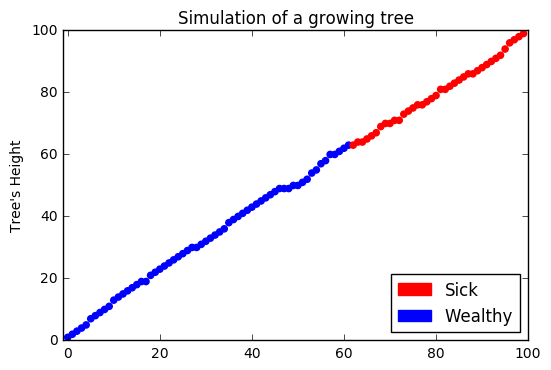

In [97]:
use_colours = {"wealthy": "blue", "sick": "red"}
plt.scatter(range(simul),h,color=[use_colours[x] for x in s])
plt.xlim([-1,simul])
plt.ylim([0,100])
plt.title('Simulation of a growing tree')
plt.ylabel('Tree\'s Height')
red_patch = mpatches.Patch(color='red', label='Sick')
blue_patch = mpatches.Patch(color='blue', label='Wealthy')
plt.legend(handles=[red_patch,blue_patch],loc=4)
plt.show()

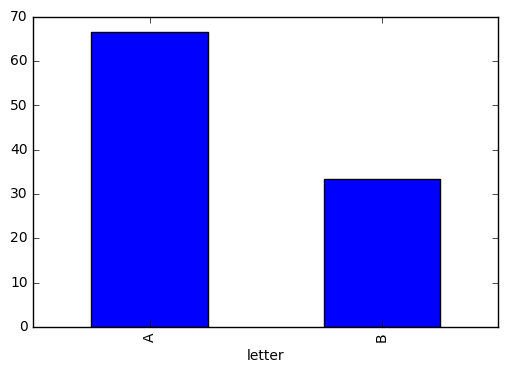

In [52]:
liste=['A']*2+['B']*1
h=list()
for i in range(200000):
    h.append(random.choice(liste))
H=pd.DataFrame(h,columns=['letter'])
a=H.groupby('letter').letter.count()
b=100*(a/a.sum())
b.plot(kind='bar')
plt.show()

In [53]:
a=2

0.42459037355771